In [1]:
console.log('Hello from Deno JS');

Hello from Deno JS


In [2]:
const name = 'AFI'
console.log(`Hello ${name}`);

Hello AFI


# Import NodeJS native modules

In [27]:
import os from 'node:os'

In [28]:
console.log(`Current directory is: ${os.homedir()}`)
console.log(`Current architecture is: ${os.arch()}`)

Current directory is: /home/afivan
Current architecture is: x64


# Import NPM modules

In [29]:
import pl from 'npm:nodejs-polars';

In [30]:
pl.readJSON('{"name": "AFIEther", "awesome": true}')

name,awesome
AFIEther,true


# Display Markdown (Deno)

In [33]:
import { display } from 'https://deno.land/x/display/mod.ts'

In [35]:
await display({
    "text/markdown": "Javascript Notebooks with Deno by **AFIEther**! ![](https://www.afiether.com/favicon.png)"
}, { raw: true });

Javascript Notebooks with Deno by **AFIEther**! ![](https://www.afiether.com/favicon.png)

# Use fetch to download files from internet

In [46]:
let response = await fetch('https://cdn.jsdelivr.net/npm/world-atlas@1/world/110m.tsv')
let data = await response.text();
let df = pl.readCSV(data, { sep: '\t' });


In [54]:
// Add an aggregation on the population (pop_est)
let sortedDf = df
    .groupBy('continent')
    .agg(pl.col('pop_est').sum().alias('Population'))
    .sort('Population', true)
    .select(pl.col('continent').alias('Continent'), pl.col('Population'))
    ;
sortedDf

Continent,Population
Asia,4085852698
Africa,993281878
Europe,728131201
North America,539350981
South America,394355478
Oceania,33519610
Antarctica,3802
Seven seas (open ocean),140


# Use Plot library to plot a chart

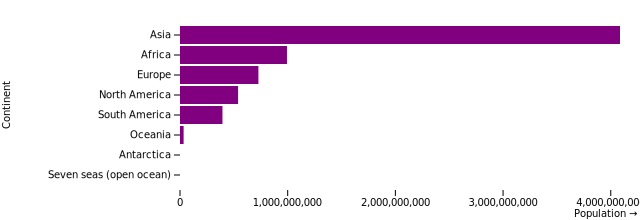

In [62]:
import Plot from 'https://deno.land/x/plot/mod.ts'
let records = sortedDf.toRecords();

Plot.plot({
    marginLeft: 180,
    marks: [
        Plot.barX(records, {
            x: "Population",
            y: "Continent",
            fill: 'purple',
            sort: { y: 'x', reverse: true },
        }),
    ]
});

# Import Tensorflow JS libraries for ML project

In [11]:
//import tf from 'npm:@tensorflow/tfjs-node'
// Use this import if you have CUDA on your machine (NVIDIA graphics card)
import tf from 'npm:@tensorflow/tfjs-node-gpu'

The kernel 'FFT' for backend 'tensorflow' is already registered
The kernel 'IFFT' for backend 'tensorflow' is already registered
The kernel 'LRN' for backend 'tensorflow' is already registered
The kernel 'LRNGrad' for backend 'tensorflow' is already registered
The kernel '_FusedMatMul' for backend 'tensorflow' is already registered
The kernel 'Abs' for backend 'tensorflow' is already registered
The kernel 'Acos' for backend 'tensorflow' is already registered
The kernel 'Acosh' for backend 'tensorflow' is already registered
The kernel 'Add' for backend 'tensorflow' is already registered
The kernel 'AddN' for backend 'tensorflow' is already registered
The kernel 'All' for backend 'tensorflow' is already registered
The kernel 'Any' for backend 'tensorflow' is already registered
The kernel 'ArgMax' for backend 'tensorflow' is already registered
The kernel 'ArgMin' for backend 'tensorflow' is already registered
The kernel 'Asin' for backend 'tensorflow' is already registered
The kernel 'Asi

In [12]:
const model = tf.sequential();

In [13]:
model.add(tf.layers.dense({units: 1, inputShape: [1]}));
model.compile({loss: 'meanSquaredError', optimizer: 'sgd'});

// HP to kw kilowatts = hp(I) × 0.7457
const xs = tf.tensor2d([1, 2, 3, 4, 5, ], [5, 1]);
const ys = tf.tensor2d([0.7457, 1.4914, 2.2371, 2.982799, 3.728499, ], [5, 1]);

// Train the model using the data.
await model.fit(xs, ys, {epochs: 3250, verbose: 0, validationSplit: 0.3, });

History {
  validationData: null,
  params: {
    epochs: 3250,
    initialEpoch: 0,
    samples: 3,
    steps: null,
    batchSize: 32,
    verbose: 0,
    doValidation: true,
    metrics: [ "loss", "val_loss" ]
  },
  epoch: [
     0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
    12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
    24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
    36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,
    48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59,
    60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
    72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83,
    84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95,
    96, 97, 98, 99,
    ... 3150 more items
  ],
  history: {
    val_loss: [
         0.007930275052785873,    0.006407310254871845,    0.005189282353967428,
         0.004213848151266575,    0.003431557910516858,   0.0028032620903104544,
        0.0022977697663009167,   0.0018903696909546852,   0.0015613659052178264,
        0.0012951255775988102,   0

In [9]:
// Use the model to do inference on a data point the model hasn't seen.
const prediction = await model.predict(tf.tensor2d([200, 10000, 20000, 5000, 29, -12], [6, 1])).data();

console.log(prediction)

Float32Array(6) [
  149.13653564453125,
  7456.82421875,
  14913.6484375,
  3728.412109375,
  21.62483024597168,
  -8.948148727416992
]


# Using Canvas with Deno and D3 library

## TODO in the future